<a href="https://colab.research.google.com/github/Gus-1003/ENEM_2021-Data_analysis/blob/main/natureQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise de Dados - Fonte: ENEM 2021


## Parte 0: Importando Bibliotecas e Lendo o Arquivo

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Mounted at /content/drive/
/content/drive/MyDrive


### Leitura do arquivo:

In [4]:
# ler dados de interesse
dados = pd.read_csv('/content/drive/MyDrive/Pesquisa_Enem2021/Base de Dados/natureQuest.csv')

## Parte 1: Análise Descritiva

### Visualização dos dados Brutos:

In [5]:
display(dados)

,Unnamed: 0,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
0,0,F,1,1,Nova Lima,MG,0,NaN,NaN,NaN
1,1,M,1,1,Maceió,AL,1,912.0,505.9,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
2,2,F,1,1,Ferraz de Vasconcelos,SP,0,NaN,NaN,NaN
3,3,M,3,2,Crato,CE,1,911.0,580.7,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
4,4,F,3,2,Acarape,CE,1,912.0,497.7,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
...,...,...,...,...,...,...,...,...,...,...
3389827,3389827,F,3,1,Goiânia,GO,0,NaN,NaN,NaN
3389828,3389828,F,1,1,Londrina,PR,0,NaN,NaN,NaN
3389829,3389829,F,3,1,Rio de Janeiro,RJ,0,NaN,NaN,NaN
3389830,3389830,F,1,1,Pouso Alegre,MG,1,1048.0,563.7,BDDCACBDEEACEBCDADBDABECCBABEAEBDCDCDBBCDBAAD


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   TP_SEXO             object 
 2   TP_COR_RACA         int64  
 3   TP_ESCOLA           int64  
 4   NO_MUNICIPIO_PROVA  object 
 5   SG_UF_PROVA         object 
 6   TP_PRESENCA_CN      int64  
 7   CO_PROVA_CN         float64
 8   NU_NOTA_CN          float64
 9   TX_RESPOSTAS_CN     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 258.6+ MB


In [7]:
# Desejo meu: usar a função isna de um jeito que ela mostre as colunas que tem mais que x valor de NAN
dados.isna().sum()

Unnamed: 0                  0
TP_SEXO                     0
TP_COR_RACA                 0
TP_ESCOLA                   0
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
TP_PRESENCA_CN              0
CO_PROVA_CN           1143988
NU_NOTA_CN            1143988
TX_RESPOSTAS_CN       1143988
dtype: int64

### Remoção das linhas NAN:

In [8]:
dados = dados.dropna(axis=0)
dados.isna().sum()

Unnamed: 0            0
TP_SEXO               0
TP_COR_RACA           0
TP_ESCOLA             0
NO_MUNICIPIO_PROVA    0
SG_UF_PROVA           0
TP_PRESENCA_CN        0
CO_PROVA_CN           0
NU_NOTA_CN            0
TX_RESPOSTAS_CN       0
dtype: int64

### Apagar dados de alunos faltantes:

In [9]:
display(dados)

,Unnamed: 0,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
1,1,M,1,1,Maceió,AL,1,912.0,505.9,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
3,3,M,3,2,Crato,CE,1,911.0,580.7,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
4,4,F,3,2,Acarape,CE,1,912.0,497.7,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
8,8,F,3,2,Belo Horizonte,MG,1,910.0,487.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB
9,9,F,3,2,Ruy Barbosa,BA,1,909.0,507.6,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED
...,...,...,...,...,...,...,...,...,...,...
3389793,3389793,F,1,1,Mogi Guaçu,SP,1,1048.0,506.0,ADBDADACEEECECCBAAEDDEAADBEACEACBCCEDBAADCBED
3389807,3389807,M,3,1,Sete Lagoas,MG,1,1048.0,435.6,CBACACCDDEBBBEDECCAEDAEBEAEABBCDDBECADCACCDCD
3389814,3389814,M,1,1,Nilópolis,RJ,1,1045.0,576.9,BECEEEEDDCCAEEECDACBBCECDBBCDBBACCEBAACCCBEEA
3389815,3389815,F,3,1,Tonantins,AM,1,1045.0,449.9,DAADCEACDEAEDBACECAECBDCABDDCCABECDCAEDACDEED


<Axes: ylabel='TP_PRESENCA_CN'>

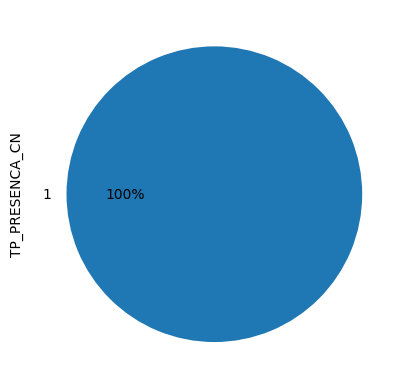

In [10]:
dados['TP_PRESENCA_CN'].value_counts().head().plot.pie(autopct='%.0f%%')

In [11]:
dados.drop('TP_PRESENCA_CN', axis=1, inplace=True)
dados.drop('Unnamed: 0', axis=1, inplace=True)
dados.head()

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
1,M,1,1,Maceió,AL,912.0,505.9,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
3,M,3,2,Crato,CE,911.0,580.7,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
4,F,3,2,Acarape,CE,912.0,497.7,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
8,F,3,2,Belo Horizonte,MG,910.0,487.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB
9,F,3,2,Ruy Barbosa,BA,909.0,507.6,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED


### Corrigindo numeração do index:

In [12]:
dados = dados.reset_index(drop=True)

In [13]:
display(dados)

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
0,M,1,1,Maceió,AL,912.0,505.9,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
1,M,3,2,Crato,CE,911.0,580.7,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
2,F,3,2,Acarape,CE,912.0,497.7,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
3,F,3,2,Belo Horizonte,MG,910.0,487.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB
4,F,3,2,Ruy Barbosa,BA,909.0,507.6,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED
...,...,...,...,...,...,...,...,...
2245839,F,1,1,Mogi Guaçu,SP,1048.0,506.0,ADBDADACEEECECCBAAEDDEAADBEACEACBCCEDBAADCBED
2245840,M,3,1,Sete Lagoas,MG,1048.0,435.6,CBACACCDDEBBBEDECCAEDAEBEAEABBCDDBECADCACCDCD
2245841,M,1,1,Nilópolis,RJ,1045.0,576.9,BECEEEEDDCCAEEECDACBBCECDBBCDBBACCEBAACCCBEEA
2245842,F,3,1,Tonantins,AM,1045.0,449.9,DAADCEACDEAEDBACECAECBDCABDDCCABECDCAEDACDEED


## Parte 2: Trabalhando com o Gabarito


### Separando as respostas em colunas:

In [14]:
dfResposta = dados[['NU_NOTA_CN', 'CO_PROVA_CN', 'TX_RESPOSTAS_CN']]
dfResposta

,NU_NOTA_CN,CO_PROVA_CN,TX_RESPOSTAS_CN
0,505.9,912.0,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
1,580.7,911.0,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
2,497.7,912.0,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
3,487.4,910.0,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB
4,507.6,909.0,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED
...,...,...,...
2245839,506.0,1048.0,ADBDADACEEECECCBAAEDDEAADBEACEACBCCEDBAADCBED
2245840,435.6,1048.0,CBACACCDDEBBBEDECCAEDAEBEAEABBCDDBECADCACCDCD
2245841,576.9,1045.0,BECEEEEDDCCAEEECDACBBCECDBBCDBBACCEBAACCCBEEA
2245842,449.9,1045.0,DAADCEACDEAEDBACECAECBDCABDDCCABECDCAEDACDEED


In [15]:
# Qubrando os Gabaritos
questoes = []
for i, gabarito in enumerate(list(dados['TX_RESPOSTAS_CN'].loc[0:])):
  questoes.append(gabarito)

final = []
for i in range(45):
  final.append([aluno[i] for aluno in questoes])

In [16]:
# Renomeando Colunas
for i in range(45):
  dfResposta['q' + str(i + 1)] = final[i]

<ipython-input-16-1863e3df4a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfResposta['q' + str(i + 1)] = final[i]
<ipython-input-16-1863e3df4a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfResposta['q' + str(i + 1)] = final[i]
<ipython-input-16-1863e3df4a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [17]:
dfResposta

,NU_NOTA_CN,CO_PROVA_CN,TX_RESPOSTAS_CN,q1,q2,q3,q4,q5,q6,q7,...,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45
0,505.9,912.0,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,D,C,B,C,C,B,D,...,D,C,C,C,B,B,C,A,D,E
1,580.7,911.0,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,C,C,A,B,B,D,A,...,A,B,C,E,A,B,A,E,B,C
2,497.7,912.0,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,B,A,B,C,D,C,C,...,D,E,C,C,A,E,D,B,C,B
3,487.4,910.0,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB,B,B,B,D,C,C,B,...,E,B,B,E,B,E,E,E,C,B
4,507.6,909.0,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,B,A,E,D,E,B,D,...,E,C,B,C,C,D,A,B,E,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245839,506.0,1048.0,ADBDADACEEECECCBAAEDDEAADBEACEACBCCEDBAADCBED,A,D,B,D,A,D,A,...,E,D,B,A,A,D,C,B,E,D
2245840,435.6,1048.0,CBACACCDDEBBBEDECCAEDAEBEAEABBCDDBECADCACCDCD,C,B,A,C,A,C,C,...,C,A,D,C,A,C,C,D,C,D
2245841,576.9,1045.0,BECEEEEDDCCAEEECDACBBCECDBBCDBBACCEBAACCCBEEA,B,E,C,E,E,E,E,...,B,A,A,C,C,C,B,E,E,A
2245842,449.9,1045.0,DAADCEACDEAEDBACECAECBDCABDDCCABECDCAEDACDEED,D,A,A,D,C,E,A,...,C,A,E,D,A,C,D,E,E,D


In [18]:
dfResposta.drop('TX_RESPOSTAS_CN', axis=1, inplace=True)
display(dfResposta)

,NU_NOTA_CN,CO_PROVA_CN,q1,q2,q3,q4,q5,q6,q7,q8,...,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45
0,505.9,912.0,D,C,B,C,C,B,D,B,...,D,C,C,C,B,B,C,A,D,E
1,580.7,911.0,C,C,A,B,B,D,A,E,...,A,B,C,E,A,B,A,E,B,C
2,497.7,912.0,B,A,B,C,D,C,C,B,...,D,E,C,C,A,E,D,B,C,B
3,487.4,910.0,B,B,B,D,C,C,B,D,...,E,B,B,E,B,E,E,E,C,B
4,507.6,909.0,B,A,E,D,E,B,D,E,...,E,C,B,C,C,D,A,B,E,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245839,506.0,1048.0,A,D,B,D,A,D,A,C,...,E,D,B,A,A,D,C,B,E,D
2245840,435.6,1048.0,C,B,A,C,A,C,C,D,...,C,A,D,C,A,C,C,D,C,D
2245841,576.9,1045.0,B,E,C,E,E,E,E,D,...,B,A,A,C,C,C,B,E,E,A
2245842,449.9,1045.0,D,A,A,D,C,E,A,C,...,C,A,E,D,A,C,D,E,E,D


### Tipos de Prova:

<Axes: ylabel='CO_PROVA_CN'>

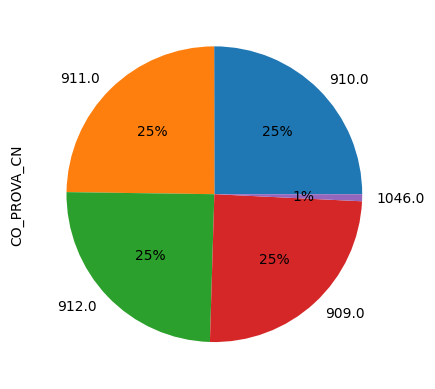

In [19]:
dfResposta['CO_PROVA_CN'].value_counts().head().plot.pie(autopct='%.0f%%')

In [20]:
dfResposta['CO_PROVA_CN'].value_counts()

910.0     540520
911.0     534778
912.0     534535
909.0     533925
1046.0     16489
1047.0     16228
1048.0     16174
1045.0     16083
1014.0      8623
1011.0      8585
1012.0      8514
1013.0      8474
917.0        874
990.0        449
992.0        431
989.0        430
991.0        421
916.0        311
Name: CO_PROVA_CN, dtype: int64

In [21]:
#Using drop() to delete rows based on column value
dfResposta.drop(dfResposta[dfResposta['CO_PROVA_CN'] > 912].index, inplace = True)
dfResposta['CO_PROVA_CN'].value_counts()

910.0    540520
911.0    534778
912.0    534535
909.0    533925
Name: CO_PROVA_CN, dtype: int64

In [22]:
dfResposta = dfResposta.reset_index(drop=True)
display(dfResposta)

,NU_NOTA_CN,CO_PROVA_CN,q1,q2,q3,q4,q5,q6,q7,q8,...,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45
0,505.9,912.0,D,C,B,C,C,B,D,B,...,D,C,C,C,B,B,C,A,D,E
1,580.7,911.0,C,C,A,B,B,D,A,E,...,A,B,C,E,A,B,A,E,B,C
2,497.7,912.0,B,A,B,C,D,C,C,B,...,D,E,C,C,A,E,D,B,C,B
3,487.4,910.0,B,B,B,D,C,C,B,D,...,E,B,B,E,B,E,E,E,C,B
4,507.6,909.0,B,A,E,D,E,B,D,E,...,E,C,B,C,C,D,A,B,E,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143753,387.9,911.0,D,E,B,D,A,C,E,B,...,B,C,D,D,A,C,E,E,D,B
2143754,452.4,910.0,B,A,C,E,C,D,A,E,...,E,B,A,D,C,E,B,D,E,A
2143755,407.2,912.0,C,A,D,D,D,D,D,E,...,E,D,D,A,D,B,E,D,C,D
2143756,540.8,911.0,C,C,C,C,A,B,A,D,...,A,C,E,A,D,A,E,C,B,B


### Agrupa os tipos de prova:

* 909	- Azul
* 910	- Amarela
* 911	- Cinza
* 912	- Rosa

In [23]:
# Separação das provas por cor
enem2021azul = dfResposta[dfResposta['CO_PROVA_CN'] == 909].reset_index(drop=True)
enem2021amarela = dfResposta[dfResposta['CO_PROVA_CN'] == 910].reset_index(drop=True)
enem2021cinza = dfResposta[dfResposta['CO_PROVA_CN'] == 911].reset_index(drop=True)
enem2021rosa = dfResposta[dfResposta['CO_PROVA_CN'] == 912].reset_index(drop=True)

In [24]:
# enem2021azul
# enem2021amarela
# enem2021cinza
# enem2021rosa

In [25]:
enem2021amarela = enem2021amarela.drop('CO_PROVA_CN', axis=1)
enem2021amarela

,NU_NOTA_CN,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45
0,487.4,B,B,B,D,C,C,B,D,C,...,E,B,B,E,B,E,E,E,C,B
1,378.5,A,C,E,E,D,B,C,C,B,...,A,E,A,C,B,D,C,E,B,D
2,516.3,A,A,E,C,C,D,A,B,C,...,E,C,C,D,B,B,E,E,D,E
3,595.2,A,D,D,C,C,A,C,A,C,...,A,E,C,B,C,E,D,A,C,E
4,386.9,B,B,E,C,E,C,D,A,D,...,B,D,C,E,D,D,A,D,E,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540515,399.6,C,A,C,C,E,E,B,D,E,...,C,E,C,A,C,B,C,A,A,C
540516,389.3,C,C,E,D,E,C,B,A,B,...,E,C,D,B,E,B,B,D,A,C
540517,563.2,A,B,E,D,C,C,E,B,D,...,A,B,B,A,E,B,C,D,A,E
540518,452.4,B,A,C,E,C,D,A,E,B,...,E,B,A,D,C,E,B,D,E,A


In [26]:
#Calculando a média das notas por cor de prova
media_amarela = enem2021amarela['NU_NOTA_CN'].mean()
media_azul = enem2021azul['NU_NOTA_CN'].mean()
media_cinza = enem2021cinza['NU_NOTA_CN'].mean()
media_rosa = enem2021rosa['NU_NOTA_CN'].mean()

#Imprimindo as médias das notas por cor de prova
print("Média da prova amarela:", media_amarela)
print("Média da prova azul:", media_azul)
print("Média da prova cinza:", media_cinza)
print("Média da prova rosa:", media_rosa)

Média da prova amarela: 492.38211204025754
Média da prova azul: 490.9438385541041
Média da prova cinza: 491.9079384342661
Média da prova rosa: 493.37753954371556


In [27]:
enem2021azul = enem2021azul.loc[:, [ 'NU_NOTA_CN', 'q42', 'q43', 'q44', 'q45', 'q37', 'q38', 'q39', 'q40', 'q41', 'q31', 
                                     'q32', 'q33', 'q16', 'q17', 'q36', 'q34', 'q35', 'q26', 'q27', 'q28',
                                     'q9', 'q10', 'q11', 'q29', 'q30', 'q18', 'q19', 'q20', 'q13', 'q14',
                                     'q15', 'q21', 'q22', 'q23', 'q24', 'q25', 'q12', 'q4', 'q5', 'q6',
                                     'q7', 'q8', 'q1', 'q2', 'q3']]
enem2021azul

,NU_NOTA_CN,q42,q43,q44,q45,q37,q38,q39,q40,q41,...,q25,q12,q4,q5,q6,q7,q8,q1,q2,q3
0,507.6,A,B,E,D,C,B,C,C,D,...,E,A,D,E,B,D,E,B,A,E
1,650.9,A,C,A,D,C,D,B,C,D,...,C,D,C,A,B,E,C,E,C,E
2,388.1,C,B,C,E,A,C,C,D,C,...,D,E,C,D,D,A,C,D,C,A
3,521.0,A,B,C,D,C,C,B,B,D,...,C,D,B,D,C,D,C,B,A,C
4,531.9,D,D,D,B,E,C,D,C,C,...,A,D,D,A,E,E,A,E,B,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533920,488.0,B,A,C,E,C,E,B,B,D,...,E,E,C,E,B,A,C,D,A,D
533921,523.6,B,B,C,A,C,D,D,C,C,...,C,C,B,B,C,B,D,B,D,E
533922,411.3,A,B,D,B,B,A,D,A,B,...,B,D,B,A,E,C,E,B,A,E
533923,540.0,A,A,C,D,C,B,C,C,B,...,C,D,C,D,D,B,A,E,E,E


In [28]:
enem2021amarela = enem2021amarela.rename(columns={'NU_NOTA_CN': 'nota'})

enem2021azul = enem2021azul.rename(columns={'q42': 'q1', 'q43': 'q2', 'q44': 'q3', 'q45': 'q4', 'q37': 'q5', 
                                                 'q38': 'q6', 'q39': 'q7', 'q40': 'q8', 'q41': 'q9', 'q31': 'q10', 
                                                 'q32': 'q11', 'q33': 'q12', 'q16': 'q13', 'q17': 'q14', 'q36': 'q15', 
                                                 'q34': 'q16', 'q35': 'q17', 'q26': 'q18', 'q27': 'q19', 'q28': 'q20',
                                                 'q9': 'q21', 'q10': 'q22', 'q11': 'q23', 'q29': 'q24', 'q30': 'q25', 
                                                 'q18': 'q26', 'q19': 'q27', 'q20': 'q28', 'q13': 'q29', 'q14': 'q30',
                                                 'q15': 'q31', 'q21': 'q32', 'q22': 'q33', 'q23': 'q34', 'q24': 'q35', 
                                                 'q25': 'q36', 'q12': 'q37', 'q4': 'q38', 'q5': 'q39', 'q6': 'q40',
                                                 'q7': 'q41', 'q8': 'q42', 'q1': 'q43', 'q2': 'q44', 'q3': 'q45', 'NU_NOTA_CN': 'nota'}).reset_index(drop=True)

In [29]:
enem2021azul

,nota,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45
0,507.6,A,B,E,D,C,B,C,C,D,...,E,A,D,E,B,D,E,B,A,E
1,650.9,A,C,A,D,C,D,B,C,D,...,C,D,C,A,B,E,C,E,C,E
2,388.1,C,B,C,E,A,C,C,D,C,...,D,E,C,D,D,A,C,D,C,A
3,521.0,A,B,C,D,C,C,B,B,D,...,C,D,B,D,C,D,C,B,A,C
4,531.9,D,D,D,B,E,C,D,C,C,...,A,D,D,A,E,E,A,E,B,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533920,488.0,B,A,C,E,C,E,B,B,D,...,E,E,C,E,B,A,C,D,A,D
533921,523.6,B,B,C,A,C,D,D,C,C,...,C,C,B,B,C,B,D,B,D,E
533922,411.3,A,B,D,B,B,A,D,A,B,...,B,D,B,A,E,C,E,B,A,E
533923,540.0,A,A,C,D,C,B,C,C,B,...,C,D,C,D,D,B,A,E,E,E


In [30]:
#ProvaCinza
enem2021cinza = enem2021cinza.loc[:, [ 'NU_NOTA_CN', 'q36', 'q37', 'q38', 'q39', 'q1', 'q2', 'q3', 
                                      'q4', 'q5', 'q33', 'q34', 'q35', 'q19', 'q20', 'q32', 'q30', 
                                      'q31', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q14', 'q15', 
                                      'q27', 'q28', 'q29', 'q16', 'q17', 'q18', 'q41', 'q42', 'q43', 
                                      'q44', 'q45', 'q40', 'q6', 'q7', 'q8','q9', 'q10', 'q11', 'q12', 'q13']]

#Prova Rosa
enem2021rosa = enem2021rosa.loc[:, [ 'NU_NOTA_CN', 'q26', 'q27', 'q28', 'q29', 'q37', 'q38', 'q39', 'q40', 'q41', 'q23',
                                            'q24', 'q25', 'q35', 'q36', 'q1', 'q21', 'q22', 'q32', 'q33', 'q34',
                                             'q2', 'q3', 'q4', 'q30', 'q31', 'q18', 'q19', 'q20', 'q42', 'q43',
                                            'q44', 'q8', 'q9', 'q10', 'q11', 'q12', 'q45', 'q13', 'q14', 'q15',
                                            'q16', 'q17', 'q5', 'q6', 'q7']]

In [31]:
enem2021rosa

,NU_NOTA_CN,q26,q27,q28,q29,q37,q38,q39,q40,q41,...,q12,q45,q13,q14,q15,q16,q17,q5,q6,q7
0,505.9,B,C,C,E,C,C,C,B,B,...,C,E,C,C,D,D,C,C,B,D
1,497.7,A,B,E,D,E,C,C,A,E,...,D,B,.,D,E,D,C,D,C,C
2,509.6,A,A,E,A,C,D,C,E,B,...,E,B,C,D,D,B,C,D,B,D
3,439.6,D,D,E,B,C,C,A,B,B,...,E,A,D,C,B,D,D,E,A,C
4,426.2,A,B,A,C,E,C,D,A,A,...,C,D,C,A,D,B,E,E,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534530,482.0,C,E,C,B,C,B,C,C,B,...,E,D,D,B,B,D,A,A,C,B
534531,380.9,A,D,D,A,A,D,D,B,E,...,B,E,D,A,C,C,C,D,E,A
534532,388.8,B,A,C,D,E,C,E,A,B,...,D,D,C,C,E,D,*,E,E,D
534533,516.3,A,A,C,B,C,C,E,D,B,...,D,D,C,E,A,E,E,D,B,D


In [32]:
enem2021cinza = enem2021cinza.rename(columns={'q36': 'q1', 'q37': 'q2', 'q38': 'q3', 'q39': 'q4', 'q1': 'q5', 'q2': 'q6', 'q3': 'q7', 
               'q4': 'q8', 'q5': 'q9', 'q33': 'q10', 'q34': 'q11', 'q35': 'q12', 'q19': 'q13', 'q20': 'q14', 
               'q32': 'q15', 'q30': 'q16', 'q31': 'q17', 'q21': 'q18', 'q22': 'q19', 'q23': 'q20', 'q24': 'q21', 
               'q25': 'q22', 'q26': 'q23', 'q14': 'q24', 'q15': 'q25', 'q27': 'q26', 'q28': 'q27', 'q29': 'q28', 
               'q16': 'q29', 'q17': 'q30', 'q18': 'q31', 'q41': 'q32', 'q42': 'q33', 'q43': 'q34', 'q44': 'q35', 
               'q45': 'q36', 'q40': 'q37', 'q6': 'q38', 'q7': 'q39', 'q8': 'q40', 'q9': 'q41', 'q10': 'q42', 
               'q11': 'q43', 'q12': 'q44', 'q13': 'q45', 'NU_NOTA_CN': 'nota'}).reset_index(drop=True)

enem2021rosa = enem2021rosa.rename(columns={'q26': 'q1', 'q27': 'q2', 'q28': 'q3', 'q29': 'q4', 'q37': 'q5',
                                             'q38': 'q6', 'q39': 'q7', 'q40': 'q8', 'q41': 'q9', 'q23': 'q10',
                                             'q24': 'q11', 'q25': 'q12', 'q35': 'q13', 'q36': 'q14', 'q1': 'q15',
                                             'q21': 'q16', 'q22': 'q17', 'q32': 'q18', 'q33': 'q19', 'q34': 'q20',
                                             'q2': 'q21', 'q3': 'q22', 'q4': 'q23', 'q30': 'q24', 'q31': 'q25',
                                             'q18': 'q26', 'q19': 'q27', 'q20': 'q28', 'q42': 'q29', 'q43': 'q30',
                                             'q44': 'q31', 'q8': 'q32', 'q9': 'q33', 'q10': 'q34', 'q11': 'q35',
                                             'q12': 'q36', 'q45': 'q37', 'q13': 'q38', 'q14': 'q39', 'q15': 'q40',
                                             'q16': 'q41', 'q17': 'q42', 'q5': 'q43', 'q6': 'q44', 'q7': 'q45', 'NU_NOTA_CN': 'nota'}).reset_index(drop=True)

In [33]:
# enem2021azul
# enem2021amarela
# enem2021cinza
enem2021rosa

,nota,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45
0,505.9,B,C,C,E,C,C,C,B,B,...,C,E,C,C,D,D,C,C,B,D
1,497.7,A,B,E,D,E,C,C,A,E,...,D,B,.,D,E,D,C,D,C,C
2,509.6,A,A,E,A,C,D,C,E,B,...,E,B,C,D,D,B,C,D,B,D
3,439.6,D,D,E,B,C,C,A,B,B,...,E,A,D,C,B,D,D,E,A,C
4,426.2,A,B,A,C,E,C,D,A,A,...,C,D,C,A,D,B,E,E,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534530,482.0,C,E,C,B,C,B,C,C,B,...,E,D,D,B,B,D,A,A,C,B
534531,380.9,A,D,D,A,A,D,D,B,E,...,B,E,D,A,C,C,C,D,E,A
534532,388.8,B,A,C,D,E,C,E,A,B,...,D,D,C,C,E,D,*,E,E,D
534533,516.3,A,A,C,B,C,C,E,D,B,...,D,D,C,E,A,E,E,D,B,D


In [34]:
enem2021 = pd.concat([enem2021amarela, enem2021azul, enem2021cinza, enem2021rosa], ignore_index=True)
display(enem2021)

,nota,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45
0,487.4,B,B,B,D,C,C,B,D,C,...,E,B,B,E,B,E,E,E,C,B
1,378.5,A,C,E,E,D,B,C,C,B,...,A,E,A,C,B,D,C,E,B,D
2,516.3,A,A,E,C,C,D,A,B,C,...,E,C,C,D,B,B,E,E,D,E
3,595.2,A,D,D,C,C,A,C,A,C,...,A,E,C,B,C,E,D,A,C,E
4,386.9,B,B,E,C,E,C,D,A,D,...,B,D,C,E,D,D,A,D,E,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143753,482.0,C,E,C,B,C,B,C,C,B,...,E,D,D,B,B,D,A,A,C,B
2143754,380.9,A,D,D,A,A,D,D,B,E,...,B,E,D,A,C,C,C,D,E,A
2143755,388.8,B,A,C,D,E,C,E,A,B,...,D,D,C,C,E,D,*,E,E,D
2143756,516.3,A,A,C,B,C,C,E,D,B,...,D,D,C,E,A,E,E,D,B,D


## Visualização das notas da Prova de CN:

In [35]:
media_ENEM_CN = enem2021['nota'].mean()
max_ENEM_CN = enem2021['nota'].min()
min_ENEM_CN = enem2021['nota'].max()
desvio_ENEM_CN = enem2021['nota'].std()

print("Medias da Prova de CN:", media_ENEM_CN)
print("A maior nota da Prova de CN:",max_ENEM_CN)
print("A menor nota da Prova de CN:", min_ENEM_CN)
print("O desvio padrão das notas da Prova de CN:", desvio_ENEM_CN)

Medias da Prova de CN: 492.1538134434948
A maior nota da Prova de CN: 0.0
A menor nota da Prova de CN: 867.1
O desvio padrão das notas da Prova de CN: 80.96089426606824


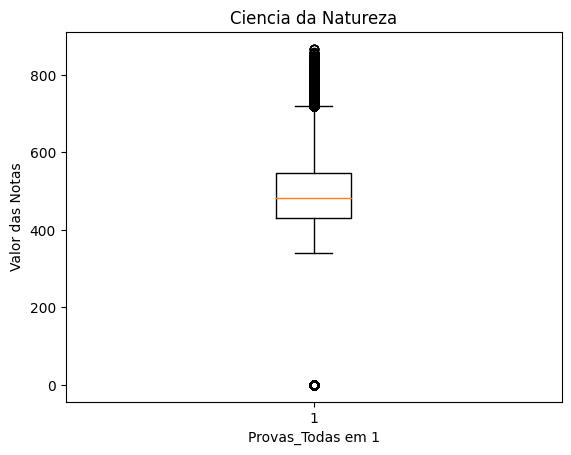

In [36]:
# Criar boxplot
plt.boxplot(enem2021['nota'])

# Adicionar rótulos e título
plt.xlabel('Provas_Todas em 1')
plt.ylabel('Valor das Notas')
plt.title('Ciencia da Natureza')

# Exibir o gráfico
plt.show()

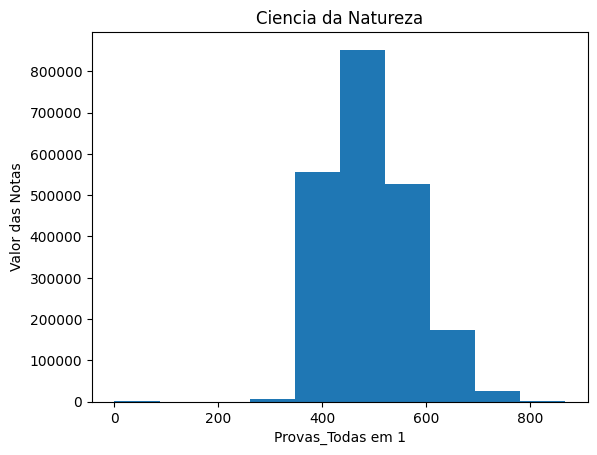

In [37]:
# Criar boxplot
plt.hist(enem2021['nota'])

# Adicionar rótulos e título
plt.xlabel('Provas_Todas em 1')
plt.ylabel('Valor das Notas')
plt.title('Ciencia da Natureza')

# Exibir o gráfico
plt.show()

In [41]:
enem2021['q1'].value_counts()

A    900305
B    491619
D    344185
C    325257
E     78990
.      2024
*      1378
Name: q1, dtype: int64

<Axes: ylabel='q2'>

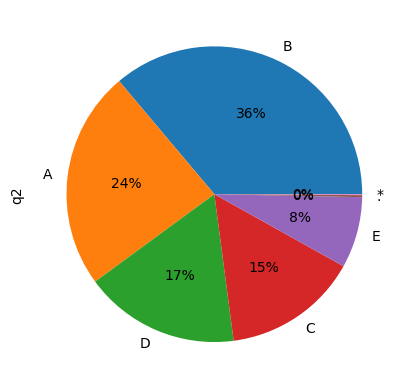

In [43]:
enem2021['q2'].value_counts().plot.pie(autopct='%.0f%%')

## Alternativas mais marcadas

In [39]:
enem2021.describe(include='object')

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45
count,2143758,2143758,2143758,2143758,2143758,2143758,2143758,2143758,2143758,2143758,...,2143758,2143758,2143758,2143758,2143758,2143758,2143758,2143758,2143758,2143758
unique,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
top,A,B,E,A,C,C,C,D,B,C,...,A,D,D,A,B,E,E,B,C,E
freq,900305,774691,626030,680578,1391486,879109,689133,652432,817353,647142,...,545304,742238,632133,659549,800359,780556,625451,630123,592347,733949


  * 1 - A, 
  * 2 - D, 
  * 3 - C, 
  * 4 - D, 
  * 5 - C, 
  * 6 - D, 
  * 7 - B, 
  * 8 - B, 
  * 9 - B, E, C, D, C, C, D, C, B, C, B, D, A, B, C, A, A, D, C, B, E, B, A, B, E, E, B, B, B, C, A, B, E, D, E, D, E

## Extra:

Salvando arquivo dos dados pré processados e organizados de acordo com a prova amarela:

In [40]:
#enem2021_organizado_csv = enem2021.to_csv('/content/drive/MyDrive/Pesquisa_Enem2021/Base de Dados/enem2021_organizado.csv')